# Gravitational Waves with PyCBC

Python is a particularly useful language because many people have add libraries to it, allowing it to be used in many different contexts. One such library is `PyCBC`, which is what we will be using in our analysis of gravitational waves.

First, we have to install the library. *Optional explanation below.*


*The line `!pip install lalsuite pycbc` below will install everything you need. Here is an explanation of what that line means:<br>
`!` - Tells the Jupyter notebook to switch from Python to shell commands, also known as command-line, which is basically just another (very useful) language.<br>
`pip` - A program accessed from the shell that will allow us to install stuff.<br>
`install` - A command for the `pip` program.<br>
`lalsuite` - The argument that tells `pip` what to install. `lalsuite` is a library that `pycbc` relies on, so we have to install it too.<br>
`pycbc` - Another argument, that tells `pip` to install this library.<br>*

In [5]:
!pip install lalsuite pycbc

     |████████████████████████████████| 30.3MB 4.3kB/s eta 0:00:011   |███▋                            | 3.4MB 822kB/s eta 0:00:33     |████████████████████████▋       | 23.3MB 1.7MB/s eta 0:00:05
     |████████████████████████████████| 3.0MB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 471kB 5.3MB/s eta 0:00:01     |█████████████████               | 245kB 5.3MB/s eta 0:00:01
     |████████████████████████████████| 798kB 1.4MB/s eta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/3f/7c/19/4914de84108f2eb0aad470552315bcb067a636050e2a1a9437
  Stored in directory: /home/nbuser/.cache/pip/wheels/5d/1e/4a/ab4122baed7d67f6abce65b2b12049d3bc7fe5dad24edf89df
  Stored in directory: /home/nbuser/.cache/pip/wheels/aa/fa/38/d61b002c627ca54f03755b9a288f4b1fa83291608a4bc47b7b
  Stored in directory: /home/nbuser/.cache/pip/wheels/36/0e/1d/4b28

Any reliable library will have documentation, which should explain how to use the program. The documentation for `PyCBC` can be found at http://pycbc.org/pycbc/latest/html/py-modindex.html. If you have questions about the methods we're using, check out the documentation first.

### Accessing LIGO Data

`PyCBC` pulls its data from https://www.gw-openscience.org/GWTC-1/, which you're welcome to explore. We can access the information through the `pycbc.catalog.Catalog` method, as shown below. 

The `Catalog()` method returns a list of binary black hole mergers already identified, so we'll iterate through the list and print the name of each merger. Remember the naming convetion for Gravitational Wave evets (year)(month)(day)

In [6]:
from pycbc import catalog

merger_list = catalog.Catalog()

for merger in merger_list:
    print(merger)                    ##remove code for students

GW150914
GW151012
GW151226
GW170104
GW170608
GW170729
GW170809
GW170814
GW170817
GW170818
GW170823


Using the code below, we can analyse the first merger in the list by calling it's parameters.

In [7]:
# The following two lines do the same thing.
merger1 = merger_list["GW150914"]
merger1 = catalog.Merger("GW150914")

#(personal note) next line takes advantage of python's inability to conceal variables
parameters = merger1.data.keys()
print(parameters)                ##remove for students to do 

dict_keys(['E_rad', 'L_peak', 'a_final', 'chi_eff', 'distance', 'far_cwb', 'far_gstlal', 'far_pycbc', 'files', 'mass1', 'mass2', 'mchirp', 'mfinal', 'redshift', 'sky_size', 'snr_cwb', 'snr_gstlal', 'snr_pycbc', 'tc', 'utctime'])


Each of the items in the list printed above is a unique parameter specifc to the merger. We can find the value of any of the parameters above. For example, if you wanted to find the chirp mass, you would use the key `mchirp`.

In [14]:
mchirp = merger1.median1d("mchirp")
print("Chirp mass:",mchirp)            ##remove for students to do

Chirp mass: 28.6


The parameters in this code is are all accessed using the `median1d` method. ##(personal note) explain what the median1d method does.
Still using `median1d` , we can access a list of paramters for all the mergers in the catalog. 

In [9]:
#We can get a list of all chirp masses, and print the whole list
mchirp_list = merger_list.median1d('mchirp')
print(mchirp_list)

#Or we can iterate through each merger, and print each chirp mass in turn
for merger in merger_list:
    this_mchirp = merger_list[merger].median1d("mchirp")
    print(merger + ":",this_mchirp)

[28.6   15.2    8.9   21.5    7.9   35.7   25.    24.2    1.186 26.7
 29.3  ]
GW150914: 28.6
GW151012: 15.2
GW151226: 8.9
GW170104: 21.5
GW170608: 7.9
GW170729: 35.7
GW170809: 25.0
GW170814: 24.2
GW170817: 1.186
GW170818: 26.7
GW170823: 29.3


Verify that the values in the list are the same as the values printed from the `foreach` loop.

### Redshift

In short, redshift is when galaxies appear to have a red hue because they are traveling away from us. The parameters you fetch above are given in the gravitational wave's reference frame. In order to do calculations, the parameter needs to be in the observers references frame on Earth. 

We are able to switch references frames with the equation below: 

$$m_{\text{observer}} = m_{\text{source}} * (1 + \text{redshift})$$

Is that the same for all parameters? Erin pls help. Let's ask maria. - Erin

Fill in the function in the cell below with the appropriate calculations to find parameters in the observer's frame.

In [8]:
def as_observer(merger_name, parameter_name):
    # first get the merger object from merger_list
    # then get the value of the parameter and the value of the redshift from the merger object
    # finally, code in the equation and return m_observer
    
    # the `pass` is a placeholder; delete it once you write the function
    pass

merger = 'GW170818'
param = 'mfinal'

source = catalog.Merger(merger).median1d(param)
observer = as_observer(merger, param)

print("Merger:", merger)
print("Parameter:", param)
print("Source:", source)
print("Observer:", observer)

Merger: GW170818
Parameter: mfinal
Source: 59.8
Observer: None


(personal note) In the losc-tutorial 1_CatalogData file, there is a section on access LIGO data (1.2) but the module doesn't seem to exist so we'll skip that.

## Plotting Data

The following code is called a magic function within Python. These built in functions allow us to call them within the code without super defining them.  and . So run this next line of code. This code takes big data sets and wraps them around each other. With having big data sets, its hard to get the graphs to line up. The inline allows for this. 

In [7]:
%matplotlib inline

Let's start plotting the data! This section will be considering the merger `GW150914`.



In [8]:
import pylab

m = catalog.Merger("GW150914")

LIGO data comes from multiple observatories to allow us to identify what parts of the data are random interference (if it only appears on one observatory) and what parts are gravitational waves (if they appear on all). We have data from two observatories, labeled as `H1` and `L1`. 

We're going to perform many identical operations on the data from each observatory. In order to simplify this and remove redundant code, we'll create an array with the data from both observatories. Then, each time we manipulate or plot the data, we'll do so by iterating through the array.

In [9]:
# initialize an empty array
data = {}

# fill the array with data from each observatory
observatories = ['H1', 'L1']
for ifo in observatories:
    data[ifo] = m.strain(ifo)

In the next cell, plot the data as follows:
* Plot each set of data in the `data` array
* X values come from the data in the array `.sample_times`
* X-axis labelled "GPS Time (s)"
* Y values come from the data in the array
* Y-axis labelled "Strain"

A legend is optional, but if you want to include it, include the term `label=ifo` in your call to the `plot` method.

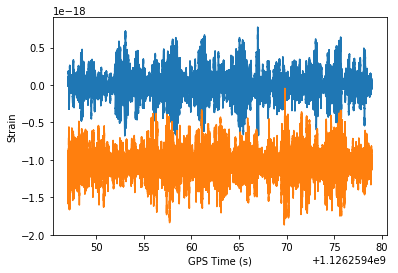

In [10]:
for ifo in data:
    pylab.plot(data[ifo].sample_times, data[ifo])
    
pylab.xlabel('GPS Time (s)')
pylab.ylabel('Strain')
pylab.show()

# delete all but the first line for students

The `sample_times` property returns an array of times that correspond to the dataset. This `pycbc` library was built to allow us to zoom in the graph to a smaller time scale, with a `time_slice()` method. 

`time_slice()` takes two parameters indicating the start and end times, and returns an object that can be plotted exactly like the original dataset. Below, you'll see code that zooms to half a second before and after `m.time`, which is the time of the actual gravitional wave.

Add to the code below to plot the zoomed data with `pylab`.

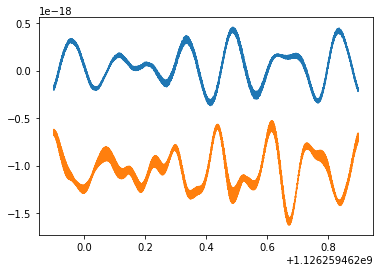

In [10]:
for ifo in data:
    start = m.time - 0.5
    end = m.time + 0.5
    
    zoomed_data = data[ifo].time_slice(start, end)
    #delete after this line
    pylab.plot(zoomed_data.sample_times, zoomed_data)
    
pylab.show()